In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Temps
t = np.linspace(0, 0.1, 1000)

In [3]:
# Fréquence réseau
f = 50
w = 2 * np.pi * f

In [4]:
# Courant normal (3 phases équilibrées)
Ia_normal = np.sin(w * t)
Ib_normal = np.sin(w * t - 2*np.pi/3)
Ic_normal = np.sin(w * t + 2*np.pi/3)


In [5]:
# Courant en manque de phase (phase B coupée)
Ia_fault = Ia_normal
Ib_fault = np.zeros_like(t)  # Phase B manquante
Ic_fault = Ic_normal

C:\Users\hey\AppData\Local\Temp\ipykernel_13460\1655032836.py:21: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\hey\AppData\Local\Temp\ipykernel_13460\1655032836.py:21: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
c:\Users\hey\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hey\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


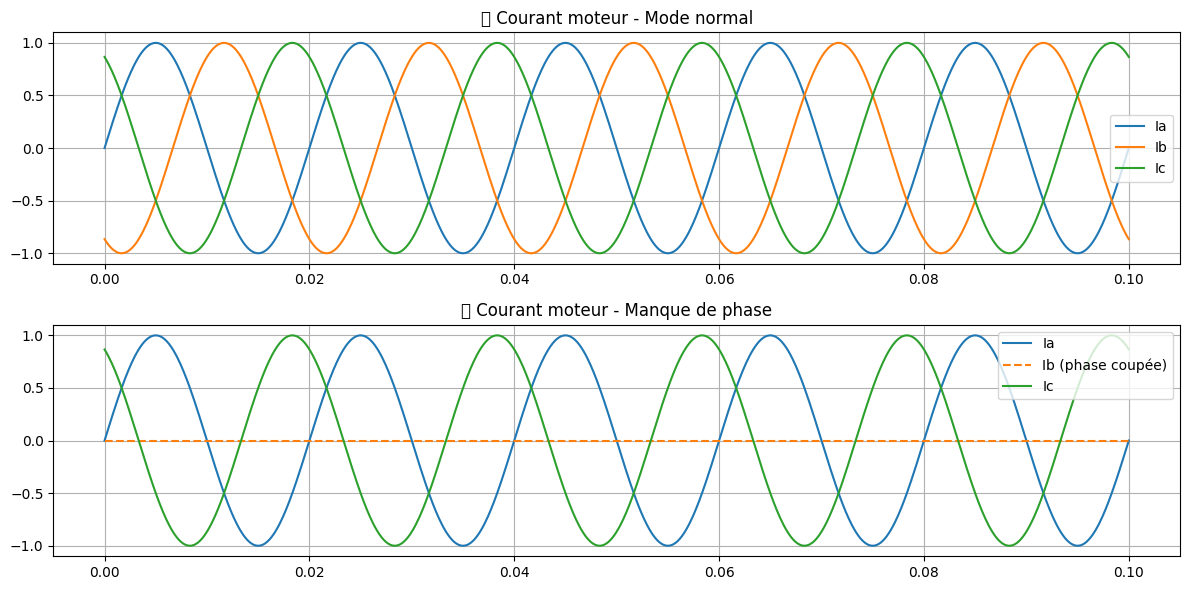

In [6]:
plt.figure(figsize=(12,6))

# Normal
plt.subplot(2,1,1)
plt.plot(t, Ia_normal, label='Ia')
plt.plot(t, Ib_normal, label='Ib')
plt.plot(t, Ic_normal, label='Ic')
plt.title("🟢 Courant moteur - Mode normal")
plt.legend()
plt.grid()

# Défaut
plt.subplot(2,1,2)
plt.plot(t, Ia_fault, label='Ia')
plt.plot(t, Ib_fault, label='Ib (phase coupée)', linestyle='--')
plt.plot(t, Ic_fault, label='Ic')
plt.title("🔴 Courant moteur - Manque de phase")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [7]:
def detect_phase_loss(Ia, Ib, Ic, seuil=0.5):
    rms_values = [np.sqrt(np.mean(Ia**2)), np.sqrt(np.mean(Ib**2)), np.sqrt(np.mean(Ic**2))]
    ecart = np.std(rms_values)
    if ecart > seuil:
        return "⚠️ Manque de phase détecté !"
    else:
        return "✅ Moteur équilibré"

print(detect_phase_loss(Ia_fault, Ib_fault, Ic_fault))


✅ Moteur équilibré


In [8]:
from scipy.fft import fft, fftfreq
# Temps
t = np.linspace(0, 0.1, 1000)
f = 50  # Hz
w = 2 * np.pi * f

# Courants normaux (triphasés équilibrés)
Ia = np.sin(w * t)
Ib = np.sin(w * t - 2*np.pi/3)
Ic = np.sin(w * t + 2*np.pi/3)

# Courants avec défaut (phase B manquante)
Ib_fault = np.zeros_like(t)

In [9]:
def compute_fft(signal, sampling_rate):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)[:N//2]
    yf_abs = 2.0 / N * np.abs(yf[0:N//2])
    return xf, yf_abs


C:\Users\hey\AppData\Local\Temp\ipykernel_13460\2279825282.py:36: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\hey\AppData\Local\Temp\ipykernel_13460\2279825282.py:36: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
c:\Users\hey\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hey\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


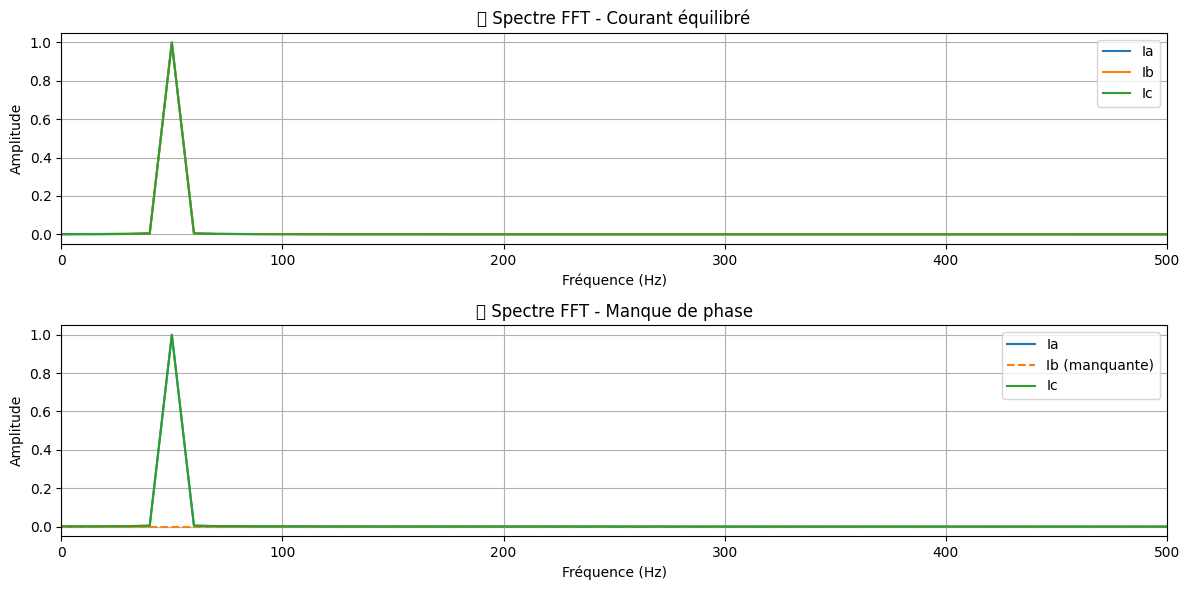

In [10]:
fs = 10000  # fréquence d'échantillonnage fictive

# Normal
xf, fft_Ia = compute_fft(Ia, fs)
_, fft_Ib = compute_fft(Ib, fs)
_, fft_Ic = compute_fft(Ic, fs)

# Défaut
_, fft_Ib_fault = compute_fft(Ib_fault, fs)

# Visualisation
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(xf, fft_Ia, label="Ia")
plt.plot(xf, fft_Ib, label="Ib")
plt.plot(xf, fft_Ic, label="Ic")
plt.title("🟢 Spectre FFT - Courant équilibré")
plt.xlim(0, 500)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(xf, fft_Ia, label="Ia")
plt.plot(xf, fft_Ib_fault, label="Ib (manquante)", linestyle="--")
plt.plot(xf, fft_Ic, label="Ic")
plt.title("🔴 Spectre FFT - Manque de phase")
plt.xlim(0, 500)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
